In [1]:
%matplotlib inline

# Introduction

In the years proceeding [Dunham _et. al._ (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJS..179..249D/abstract), we've observed astronomers misuse the original 70 micron correlation, widely applying it to non-class 0 protostars. Hence, in this notebook, we aim to quantify the error introduced should one use the fit presented in [Dunham _et. al._ (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJS..179..249D/abstract), instead of our own. For clarity, we'll refer to the original fit as `dfit` (a.k.a. Dunham's fit), and the updated fit as `yfit` (a.k.a. Yek's fit).

# Import Dependencies

In [2]:
# System & OS
import warnings
warnings.filterwarnings('ignore')

# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')      # background
plt.rc('figure', titlesize=24)  # figure title 
plt.rc('axes', titlesize=18)    # axes title
plt.rc('axes', labelsize=18)    # xy labels
plt.rc('xtick', labelsize=14)   # x tick labels
plt.rc('ytick', labelsize=14)   # y tick labels
plt.rc('legend', fontsize=14)   # legend

# Mount Storage

`cd` to the `data/` directory.

In [3]:
%cd '../data/'

/Users/zach/Documents/Projects/Protostellar-Luminosity/data


# Feature Engineering

Read in our results from `2_linear_regression.ipynb`, only selecting the data closest to 70 microns.

In [4]:
# Read in linear coefficients
coef = pd.read_csv('lin_coef.csv', skiprows=1, names=['Class', 
                                                      'Wavelength (microns)', 
                                                      'Slope', 
                                                      'Unc_slope', 
                                                      'Intercept', 
                                                      'Unc_intercept'])
# Read in correlation metrics
corr = pd.read_csv('corr_coef.csv', skiprows=1, names=['Class', 
                                                       'Wavelength (microns)', 
                                                       'Reduced chi-squared (linear space)', 
                                                       'Reduced chi-squared (log10 space)', 
                                                       'Correlation coefficient (linear space)', 
                                                       'Correlation coefficient (log10 space)'])

# Merge the two dataframes along the class and wavelength columns
df = pd.merge(coef, corr, on=['Class', 'Wavelength (microns)'])
# Drop the rows with all wavelengths
df.drop(index=[400, 401, 402, 403], inplace=True)
# Typecast wavelength column to float
df['Wavelength (microns)'] = df['Wavelength (microns)'].apply(lambda x: float(x))
# Retrive rows with wavelength closest to 70 microns
df = df[np.isclose(df['Wavelength (microns)'], 7.35706025e+01)]
df

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept,Reduced chi-squared (linear space),Reduced chi-squared (log10 space),Correlation coefficient (linear space),Correlation coefficient (log10 space)
104,0,73.570602,0.991177,0.001600,-9.123577,0.002088,nan,-28.963521,0.919712,0.982471
105,1a,73.570602,1.051372,0.002000,-9.460327,0.002296,nan,-165.302103,0.856317,0.945712
106,1b,73.570602,1.022947,0.001951,-9.593142,0.001472,nan,-127.579043,0.965017,0.945657
107,All,73.570602,1.107987,0.001333,-9.520574,0.001383,nan,-514.076791,0.797523,0.947305


Also load the results from `1_model_analysis.ipynb` closest to 70 microns.

In [5]:
ndarray = np.load('70_micron_data.npy', allow_pickle=True)
data = pd.DataFrame(ndarray, columns=['Class', 'Wavelength (microns)', 'Flux', 'L_int'])
data

,Class,Wavelength (microns),Flux,L_int
0,0,73.570602,0.0,2.0869
1,0,73.570602,0.0,2.0869
2,0,73.570602,0.0,2.0869
3,0,73.570602,0.0,2.0869
4,0,73.570602,0.0,2.0869
...,...,...,...,...
78960,1b,73.570602,0.0,5.9644
78961,1b,73.570602,0.0,5.9644
78962,1b,73.570602,0.0,5.9644
78963,1b,73.570602,0.0,5.9644


# Data Analysis

First, visualize the flux values predicted by `dfit` as a function of internal luminosity, for class 0, 1a, and 1b objects. Note, since `dfit` was only tested against class 0 protostars, we'll use the same parameters (`m = 1.06`, `b = -9.02`) for all three classes.

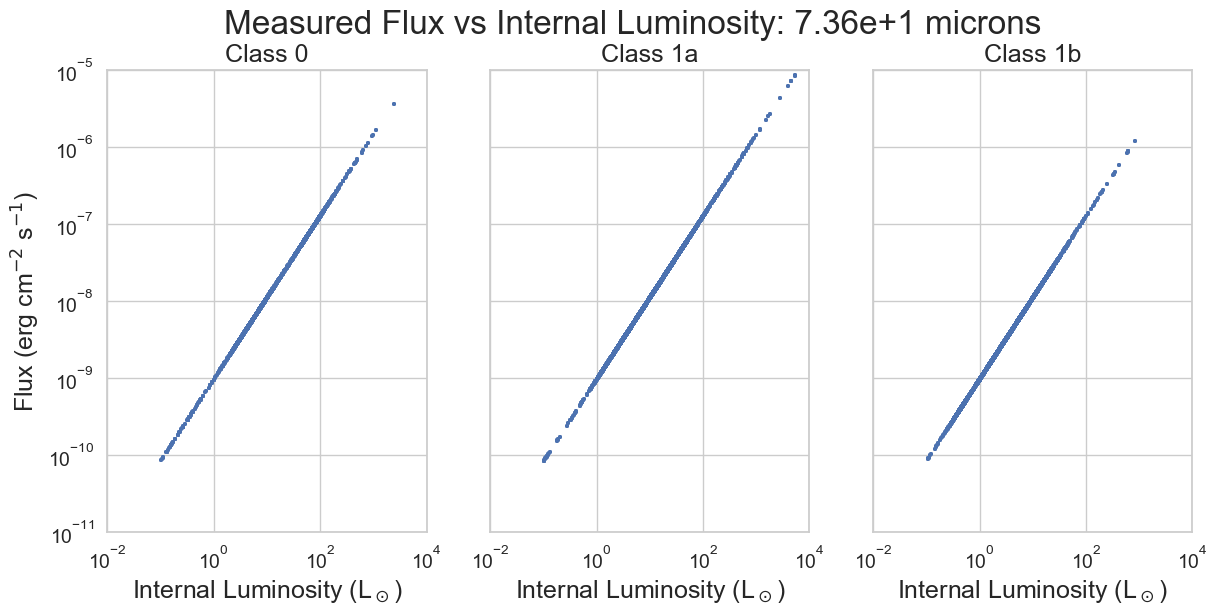

In [6]:
# Create 3-figure plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6), sharey=True)
# Set title
fig.suptitle('Measured Flux vs Internal Luminosity: 7.36e+1 microns')
# Customize shared y-axis
ax[0].set_ylabel('Flux (erg cm$^{-2}$ s$^{-1}$)')
ax[0].set_yscale('log')
ax[0].set_ylim([1e-11, 1e-5])
# Map class name to subplot position
class_map = {'0': 0, '1a': 1, '1b': 2}
for class_name in class_map:
    # Extract internal luminosity data for this class
    x = data[data['Class'] == class_name]['L_int']
    # Compute measured flux from Dunham's fit
    m, b = 1.06, -9.02
    y = 10**b * x**m
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(x, y, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('Internal Luminosity (L$_\odot$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-2, 1e4])
# Save figure
plt.savefig(f'Figures/dfit.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/dfit.jpg', format='jpg')
plt.show()

Next, we visualize the expected flux values from `yfit` as a function of internal luminosity, across all 3 available classes.

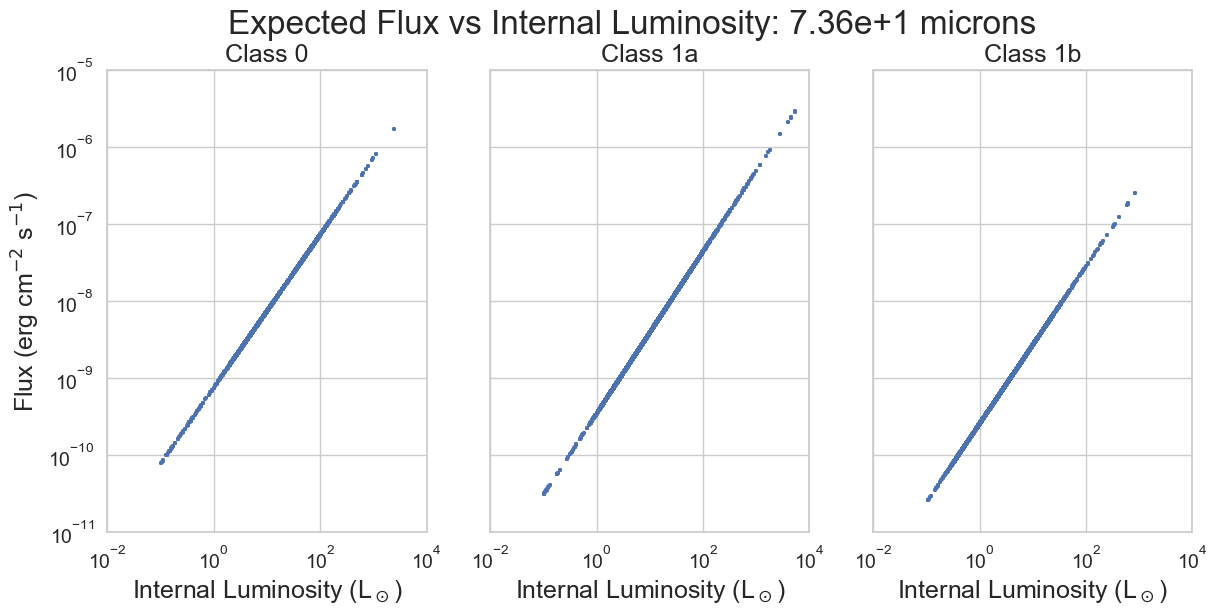

In [7]:
# Create 3-figure plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6), sharey=True)
# Set title
fig.suptitle('Expected Flux vs Internal Luminosity: 7.36e+1 microns')
# Customize shared y-axis
ax[0].set_ylabel('Flux (erg cm$^{-2}$ s$^{-1}$)')
ax[0].set_yscale('log')
ax[0].set_ylim([1e-11, 1e-5])
# Map class name to subplot position
class_map = {'0': 0, '1a': 1, '1b': 2}
for class_name in class_map:
    # Extract internal luminosity data for this class
    x = data[data['Class'] == class_name]['L_int']
    # Extract linear coefficients for this class
    m, b = df[df['Class'] == class_name]['Slope'].values[0], df[df['Class'] == class_name]['Intercept'].values[0]
    # Compute expected flux from linear fit
    y = 10**b * x**m
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(x, y, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('Internal Luminosity (L$_\odot$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-2, 1e4])
# Save figure
plt.savefig(f'Figures/yfit.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/yfit.jpg', format='jpg')
plt.show()

To compute the error introduced by using `dfit` as opposed to `yfit`, we can normalize `dfit` w.r.t. `yfit`, and visualize it against the flux values predicted by `yfit`. In other words, we define error to be
$$
\begin{equation*}
\text{error}=\frac{F_\text{dfit}}{F_\text{yfit}}
\end{equation*}
$$
where $F$ denotes flux; if $\text{error}>1$, `dfit` overpredicts, whereas if $\text{error}<1$, `dfit` underpredicts. Naturally, the correction factor is simply given by
$$
\begin{equation*}
\text{correction factor}=\frac{1}{\text{error}}
\end{equation*}
$$
and will be a function of flux.

1.085066364242338 2.168926558704528
2.702113332739035 3.0340881550302634
3.4437248724988136 4.802341607087568


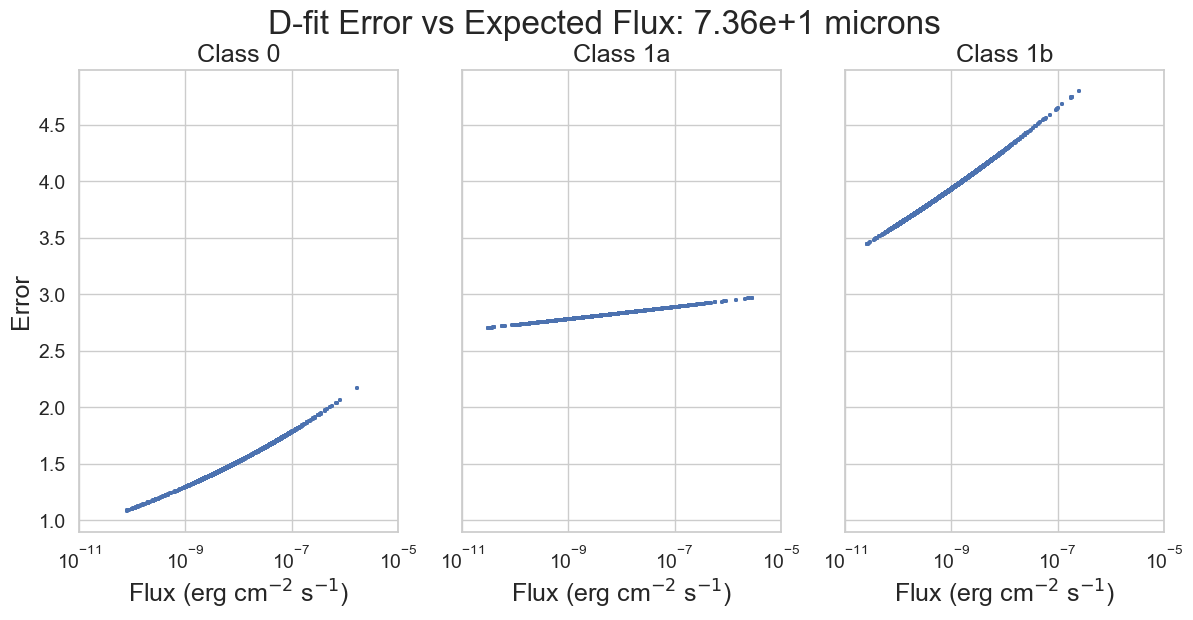

In [8]:
# Create 3-figure plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6), sharey=True)
# Set title
fig.suptitle('D-fit Error vs Expected Flux: 7.36e+1 microns')
# Customize shared y-axis
ax[0].set_ylabel('Error')
# Map class name to subplot position
class_map = {'0': 0, '1a': 1, '1b': 2}
for class_name in class_map:
    # Extract internal luminosity data for this class
    x = data[data['Class'] == class_name]['L_int']
    # Extract linear coefficients for this class
    m, b = df[df['Class'] == class_name]['Slope'].values[0], df[df['Class'] == class_name]['Intercept'].values[0]
    # Compute expected flux from linear fit
    yfit = 10**b * x**m
    # Compute measured flux from Dunham's fit
    dfit = 10**-9.02 * x**1.06
    # Calculate error
    error = dfit / yfit
    # Print min and max error
    print(error.min(), error.max())
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(yfit, error, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('Flux (erg cm$^{-2}$ s$^{-1}$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-11, 1e-5])
# Save figure
plt.savefig(f'Figures/d-fit_error.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/d-fit_error.jpg', format='jpg')
plt.show()

Therefore, we conclude that for class 0 objects, `dfit` overpredicts by a factor of roughly `1.0 - 2.2`; for class 1a objects, a factor of roughly `2.7 - 3.1`; for class 1b objects, a factor of roughly `3.4 - 4.9`.

Out of curiosity, let's compute the error introduced by using `yfit` at class 0 for non-class 0 objects.

1.1112496730394523 2.4940862403458883
2.380650936736006 3.1661445053335697


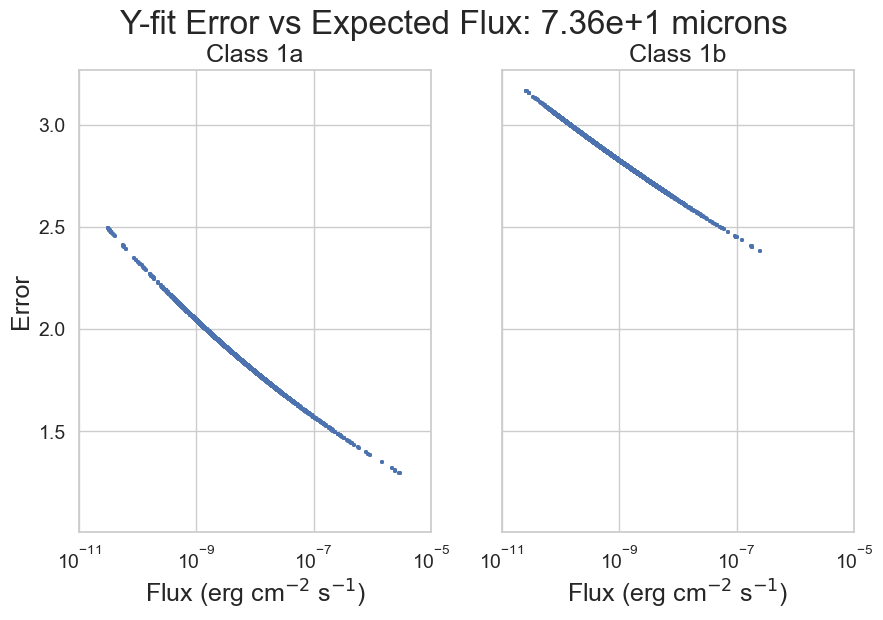

In [9]:
# Create 2-figure plot
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
# Set title
fig.suptitle('Y-fit Error vs Expected Flux: 7.36e+1 microns')
# Customize shared y-axis
ax[0].set_ylabel('Error')
# Map class name to subplot position
class_map = {'1a': 0, '1b': 1}
for class_name in class_map:
    # Extract internal luminosity data for this class
    x = data[data['Class'] == class_name]['L_int']
    # Extract linear coefficients for this class
    m, b = df[df['Class'] == class_name]['Slope'].values[0], df[df['Class'] == class_name]['Intercept'].values[0]
    # Compute expected flux from linear fit
    yfit = 10**b * x**m
    # Compute measured flux from Yek's class 0 fit
    m_0, b_0 = df[df['Class'] == '0']['Slope'].values[0], df[df['Class'] == '0']['Intercept'].values[0]
    yfit_0 = 10**b_0 * x**m_0
    # Calculate error
    error = yfit_0 / yfit
    # Print min and max error
    print(error.min(), error.max())
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(yfit, error, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('Flux (erg cm$^{-2}$ s$^{-1}$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-11, 1e-5])
# Save figure
plt.savefig(f'Figures/y-fit_error.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/y-fit_error.jpg', format='jpg')
plt.show()

In other words, `yfit` at class 0 overpredicts by a factor of `1.1 - 2.5` for class 1a objects, and `2.3 - 3.2` for class 1b objects.